In [1]:
from home_finder.text_analysis import TfIdfMaker
from home_finder.image_analysis import AI_SimRanker
from home_finder.similar_properties import SimilarProperties

In [2]:
ranking_weights = {'tf_idf_cosine': 1.5, 'neighbours': 1.0, 'object_detection': 1.2, 'ai_similarity': 2.5}
r_types = ['tf_idf_cosine', 'neighbours', 'object_detection', 'ai_similarity']

# img_input = SimilarProperties().ready('sample_property_images.csv')
# SimilarProperties.ensemble(input=img_input, ranking_types=r_types)

In [3]:
all_data = SimilarProperties().ready('sample_property_images.csv')
train = all_data[:int(len(all_data)*0.8)]
test = all_data[int(len(all_data)*0.8):]

print(len(train))
print(len(test))

472 image data items ready for analysis.
377
95


In [4]:
SimilarProperties.ensemble(input=train, ranking_types=r_types, weights=ranking_weights)
SimilarProperties.image_retriever.tf_maker.transformed_data

Extracting object features...


array([[   -0.11113,    -0.11551,    -0.22078, ...,    -0.26436,     -0.6067,    -0.11529],
       [   -0.11113,    -0.11551,    -0.22078, ...,      3.6713,     -0.6067,    -0.11529],
       [   -0.11113,    -0.11551,    -0.22078, ...,    -0.26436,      1.1004,    -0.11529],
       ...,
       [   -0.11113,    -0.11551,    -0.22078, ...,    -0.26436,      2.8857,    -0.11529],
       [   -0.11113,    -0.11551,    -0.22078, ...,    -0.26436,       1.797,    -0.11529],
       [   -0.11113,    -0.11551,    -0.22078, ...,    -0.26436,     -0.6067,    -0.11529]], shape=(377, 396))

In [5]:
allowed = SimilarProperties.image_retriever.object_maker.allowed_objects
print(len(allowed))
allowed[:20]

396


array(['accent', 'accents', 'access', 'add', 'adding', 'adds', 'adjacent', 'adjoining', 'adorned', 'aerial', 'allowing', 'allows', 'alongside', 'amenities', 'ample', 'apartment', 'appears', 'appliances', 'architectural', 'architecture'], dtype=object)

In [6]:
test_words = {i: {'features': SimilarProperties.image_retriever.tf_maker.transform(imgd.description), 'words': [w for w in SimilarProperties.image_retriever.tf_maker.word_features if w in imgd.description]} for i, imgd in enumerate(test)}
test_words

{0: {'features': array([[   -0.11113,    -0.11551,    -0.22078,    -0.12678,    -0.12664,    -0.11541,    -0.26483,    -0.17846,    -0.13656,    -0.18056,    -0.16306,    -0.16313,    -0.11546,    -0.13701,    -0.20829,    -0.11103,    -0.44127,    -0.29087,    -0.19464,    -0.13669,    -0.68566,    -0.17211,    -0.14403,
             -0.11579,    -0.15536,    -0.17254,    -0.13734,     -0.1991,    -0.25867,      9.3249,    -0.12139,    -0.11226,    -0.11469,    -0.12644,    -0.31054,    -0.20785,    -0.12634,    -0.32245,    -0.25292,    -0.20965,    -0.15539,    -0.15349,    -0.13721,     -0.1618,     -0.1867,    -0.18703,
             -0.12651,    -0.11551,    -0.12684,    -0.11495,      2.0536,    -0.12666,      1.5934,    -0.25359,    -0.41809,    -0.19504,    -0.31747,    -0.27253,    -0.12605,    -0.24658,    -0.38595,    -0.19498,      5.5103,    -0.41256,    -0.22126,    -0.25336,    -0.34195,    -0.12692,    -0.13606,
             -0.13687,    -0.21592,    -0.13712,    -0.163

In [7]:
# now to test:
import random
import math

test_1 = test_words[0]
n_kw = len(test_1['words'])
# print(n_kw)

random_kws = []
for _ in range(math.ceil(n_kw*0.1)):
    keyw = (random.choice(test_1['words']))
    if keyw not in random_kws:
        random_kws.append(keyw)

random_kws

['features', 'facade', 'park']

Ranking images with tf_idf_cosine...
Ranking images with neighbours...
Ranking images with object_detection...
Ranking images with ai_similarity...
Index size: 472, Paths size: 472


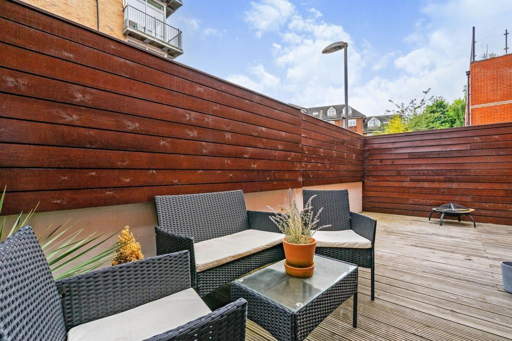

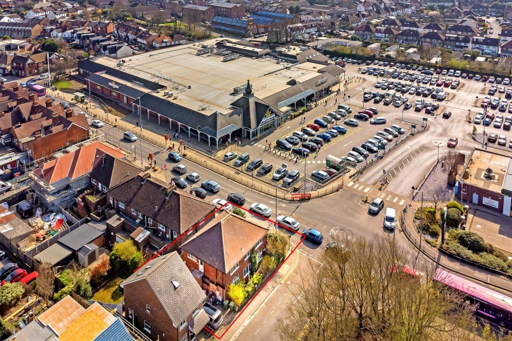

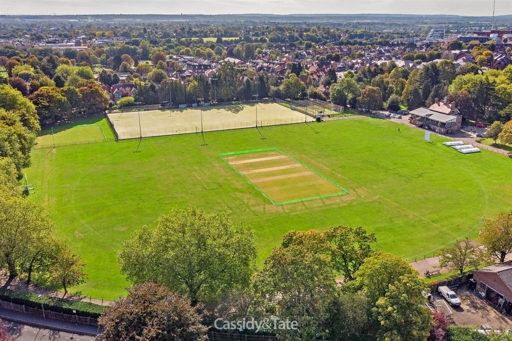

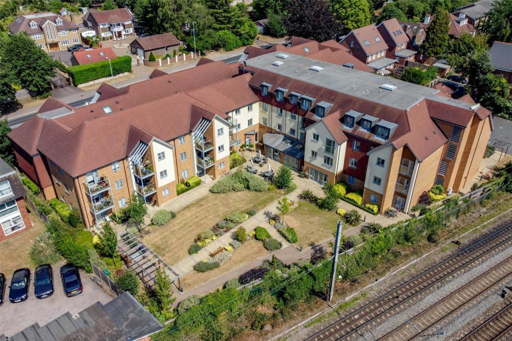

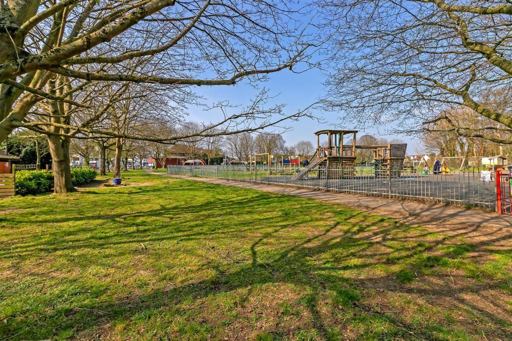

[ImageData(url='https://media.rightmove.co.uk/104k/103291/130882220/103291_ALB104863_IMG_01_0000.jpeg', description='The image shows a private outdoor terrace with wooden flooring and surrounding walls for privacy. There is a set of rattan garden furniture including a sofa, chairs, and a table with a glass top. A potted plant adds a touch of greenery, and there is an outdoor fire pit. The space is well-lit by natural light and a street lamp nearby.', path_name='tmp/images/103291_ALB104863_IMG_01_0000.jpeg', objects={'potted plant': 0.7171380519866943, 'chair': 0.6959527134895325, 'couch': 0.5535448789596558, 'bench': 0.4134621024131775, 'vase': 0.2565252184867859}, scores={'tf_idf_cosine': 0.44871883894396725, 'neighbours': 0.48870079332307226, 'object_detection': 0.0, 'ai_similarity': 0.9336870026525199, 'final_score': 0.8739991395925808}),
 ImageData(url='https://media.rightmove.co.uk/175k/174341/121777088/174341_31388259_IMG_11_0000.jpeg', description='This is an aerial view of a st

In [8]:
most_relevant = SimilarProperties.query(query=' '.join(random_kws))
most_relevant

In [9]:
from ultralytics.solutions import VisualAISearch
candidate_imgs = [imd.path_name for imd in most_relevant]
ai_image_model:VisualAISearch = [r for r in SimilarProperties.image_retriever.ranking_types if r._name() == 'ai_similarity'][0].ai_model
ai_image_model

In [ ]:
test_img_features = ai_image_model.extract_image_feature(test[0].path_name)
print(test_img_features.shape)
# test_img_features
retrieved_img_features = [ai_image_model.extract_image_feature(ret.path_name) for ret in most_relevant]
for rif in retrieved_img_features:
    # print(rif.shape)
    



(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 512)


Ranking images with tf_idf_cosine...
Ranking images with neighbours...
Ranking images with object_detection...
Ranking images with ai_similarity...
Error initializing searcher: No module named 'tqdm'
Clearing cache and retrying...
Failed to initialize searcher after cache clear: No module named 'tqdm'
Using fallback scoring (random)


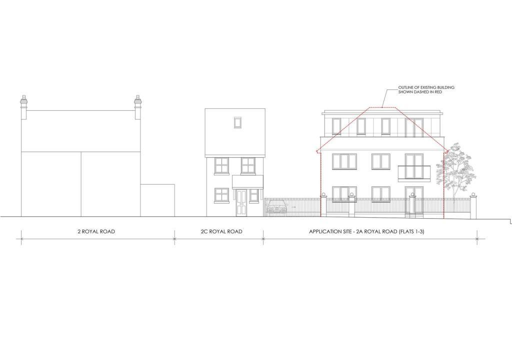

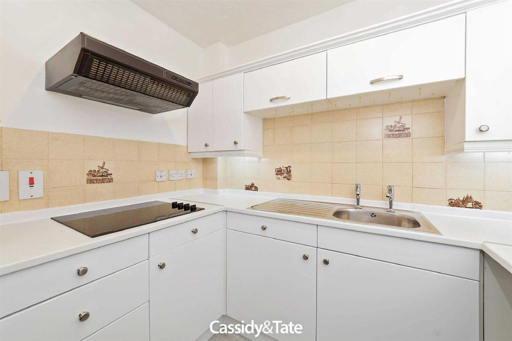

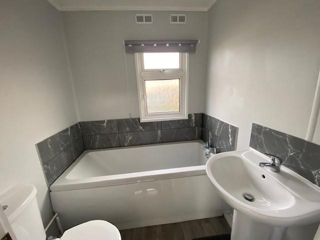

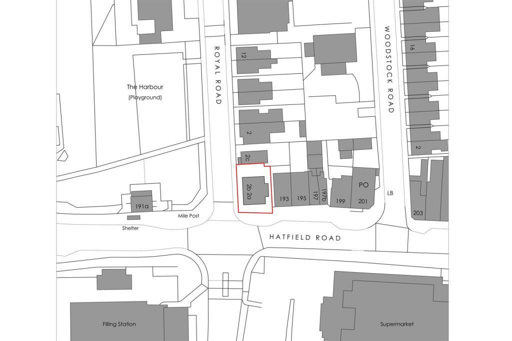

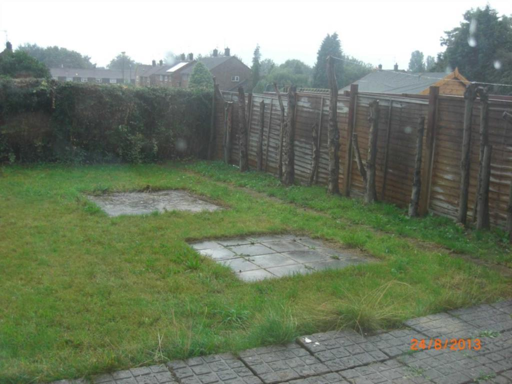

[ImageData(url='https://media.rightmove.co.uk/175k/174341/121777088/174341_31388259_IMG_01_0000.jpeg', description='This is an architectural elevation drawing showing a comparison between existing and proposed structures at 2A Royal Road. The left side of the drawing shows adjoining properties for context, while the right side provides a front view of the proposed building development highlighting the additions to the existing structure, depicted with a dashed red line. The design suggests a multi-level residential building with', path_name='tmp/images/174341_31388259_IMG_01_0000.jpeg', objects={}, scores={'tf_idf_cosine': 0.9548692596774182, 'neighbours': 0.5691666812614256, 'object_detection': 0.0, 'ai_similarity': 0.865177077858696, 'final_score': 0.597303254699385}),
 ImageData(url='https://media.rightmove.co.uk/175k/174341/117898208/174341_31174185_IMG_15_0000.jpeg', description='The image shows a kitchen with built-in white cabinets, a stainless steel sink, and ceramic hob. There

In [4]:
SimilarProperties.query('spacious kitchen, sunny living room')